# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
# I acknowledge that I have used AI to the extent permitted by the UVA
# AI acceptable use policy. I acknowlegde that I am aware of the possibility
# of AI producing errors and offensive content and certify that I
# have taken the necessary measures to ensure that the work produced is both
# accurate and ethical to the best of my ability and knowledge.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist


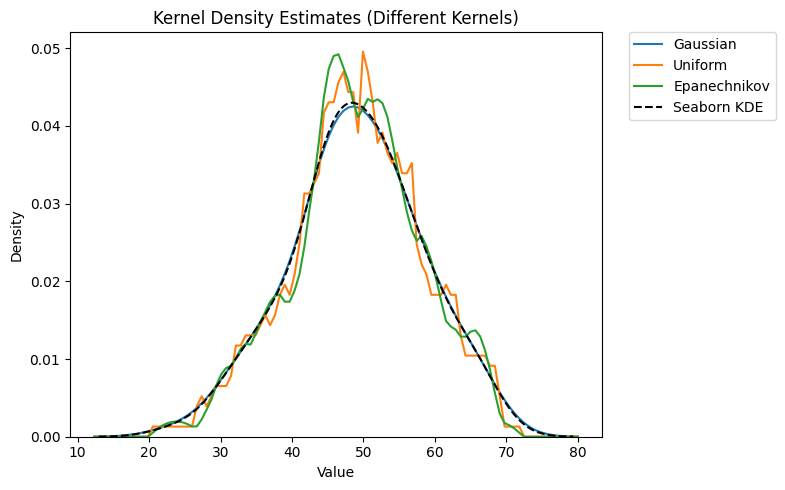

In [56]:
# Question 1

#Loaded in data and assigned to object "pretrial"
pretrial = pd.read_csv('pretrial_data.csv')

def my_kde(data, bandwidth=None, grid_points=100):
    """
    Simple KDE function with Gaussian, Uniform, Epanechnikov kernels.
    """
    data = np.asarray(data).reshape(-1, 1)
    n = len(data)

    # Silverman's rule if user doesn't specify otherwise
    if bandwidth is None:
        std = np.std(data, ddof=1)
        bandwidth = 1.06 * std * n ** (-1/5)

    # Grid for evaluation
    xs = np.linspace(data.min() - 3*bandwidth, data.max() + 3*bandwidth, grid_points).reshape(-1, 1)
    distances = (xs - data.T) / bandwidth  # broadcasting

    # Kernels
    kernels = {
        "Gaussian": 1/np.sqrt(2*np.pi) * np.exp(-0.5 * distances**2),
        "Uniform": 0.5 * (np.abs(distances) <= 1),
        "Epanechnikov": 0.75 * (1 - distances**2) * (np.abs(distances) <= 1)
    }

    # Plot
    plt.figure(figsize=(8, 5))
    for name, K in kernels.items():
        density = K.mean(axis=1) / bandwidth
        plt.plot(xs, density, label=name)

    # Seaborn comparison
    sns.kdeplot(data.flatten(), label="Seaborn KDE", color="black", linestyle="--")

    plt.title("Kernel Density Estimates (Different Kernels)")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
    plt.tight_layout()
    plt.show()

# Example usage with 'pretrial' dataset
np.random.seed(42)
pretrial = pd.Series(np.random.normal(loc=50, scale=10, size=100))

my_kde(pretrial)



**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
# Question 2.1
college = pd.read_csv('college_completion.csv')

In [20]:
# Question 2.2
college.head(10)

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
5,5,100751,University of Alabama at Tuscaloosa,Tuscaloosa,Alabama,4-year,Public,Research Universities--high research activity,NaN,X,...,61.5,8.5,6.3,5.5,183044|209551|240727|207388|178402|185828|2380...,13,96,75.9|07,NaN,4438.0
6,6,100760,Central Alabama Community College,Alexander City,Alabama,2-year,Public,Associates--Public Rural-serving Medium,NaN,NaN,...,NaN,NaN,NaN,NaN,217712|227225|198491|175935|107460|206923|2407...,25,289,66.7|10,NaN,594.0
7,7,100830,Auburn University at Montgomery,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,NaN,NaN,...,NaN,NaN,NaN,NaN,229814|210429|160038|176965|169798|207263|1023...,13,386,43.8|07,AUM,536.0
8,8,100858,Auburn University,Auburn University,Alabama,4-year,Public,Research Universities--high research activity,NaN,NaN,...,72.2,9.7,2.0,4.6,223232|204024|163268|165334|132903|171128|1961...,13,96,75.5|07,NaN,4165.0
9,9,100937,Birmingham-Southern College,Birmingham,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,174747|153144|143084|152390|168591|199111|1406...,16,252,88.9|07,BSC,449.0


In [21]:
print(college.shape)

(3798, 63)


In [4]:
# Question 2.3
crosstab = pd.crosstab(college['control'], college['level'])
print(crosstab)

ratio = pd.crosstab(college['control'], college['level'], normalize = True)
print(ratio)

# The crosstab shows that private 4-year not-for-profit colleges have the most
# graduates while 2 year private not-for-profit colleges have the least.
# Public 2 year colleges have more graduates than their 4 year counterparts - a
# relative difference that is only the case for public colleges. For both private
# for-profit and not-for-profit colleges, the 4 year programs have more graduates
# than their 2 year programs do.

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


/tmp/ipython-input-543967172.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(college['grad_100_value'], shade=True)


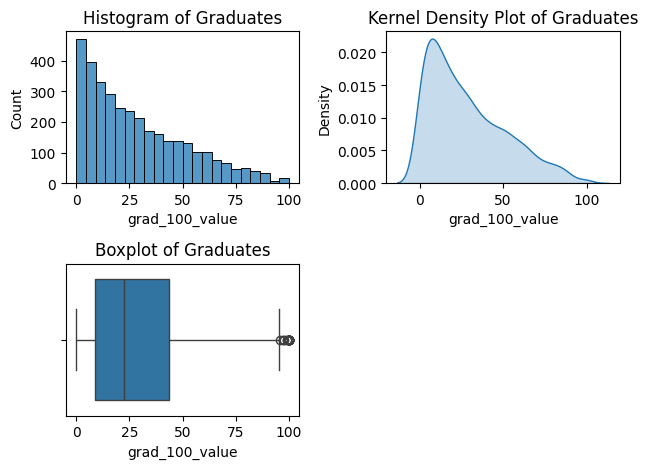

In [5]:
# Question 2.4 For grad_100_value, create a histogram, kernel density plot,
# boxplot, and statistical description.


plt.subplot(2, 2, 1)
sns.histplot(college['grad_100_value'], kde=False)
plt.title('Histogram of Graduates')

plt.subplot(2, 2, 2)
sns.kdeplot(college['grad_100_value'], shade=True)
plt.title('Kernel Density Plot of Graduates')


plt.subplot(2, 2, 3)
sns.boxplot(x=college['grad_100_value'])
plt.title('Boxplot of Graduates')

plt.tight_layout()
plt.show()

desc = college['grad_100_value'].describe()

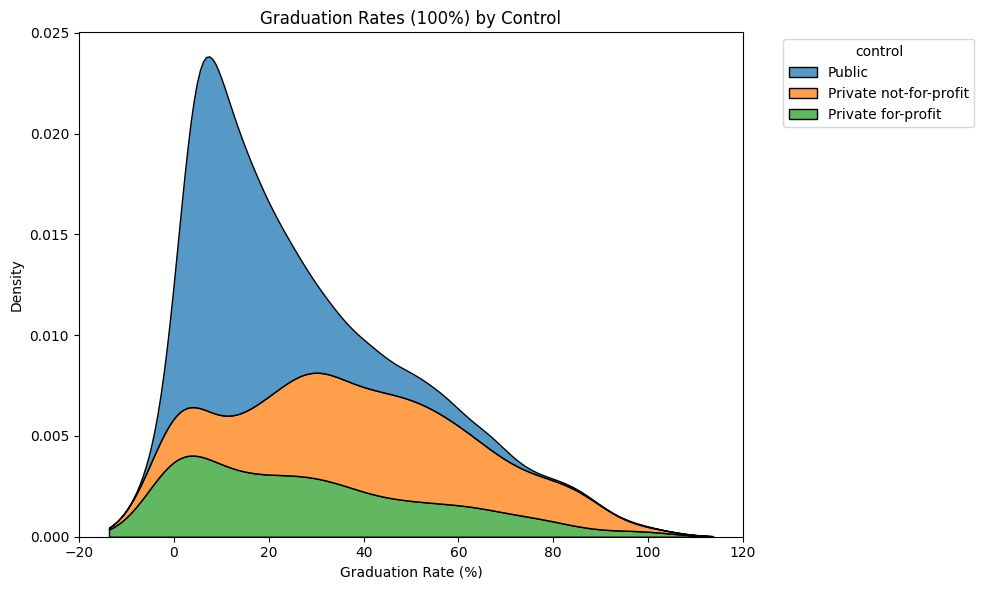

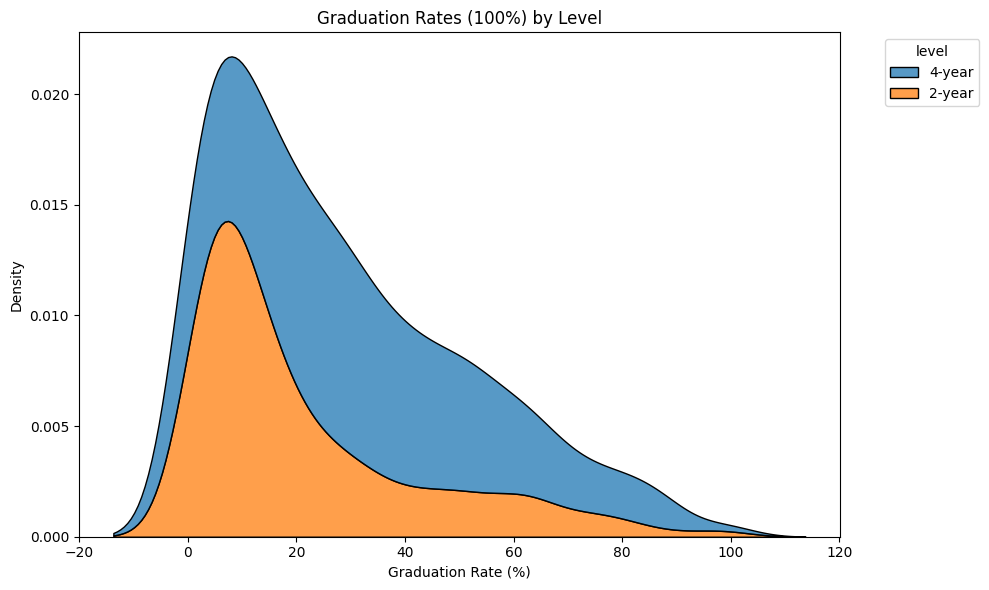

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [59]:
# Question 2.5
# For grad_100_value, create a grouped kernel density plot by control and by level.
# Describe what you see. Use groupby and .describe to make grouped calculations
# of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates?

plt.figure(figsize=(10,6))
ax = sns.kdeplot(
    data=college,
    x="grad_100_value",
    hue="control",
    multiple="stack",
)
plt.title("Graduation Rates (100%) by Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")

# Fix: get the legend object and move it
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.05, 1))
leg._loc = 2  # upper left
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
ax = sns.kdeplot(
    data=college,
    x="grad_100_value",
    hue="level",
    multiple="stack"
)
plt.title("Graduation Rates (100%) by Level")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")

# Fix: get the legend object and move it
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.05, 1))
leg._loc = 2  # upper left
plt.tight_layout()
plt.show()



# The control density plot shows us that private NFP schools have a higher graduation
# rate as they have the highest density for higher graduation rates. Private
# for-profit schools' graduation rates seem to be the lowest as their highest
# density is for lower graduation rates. Public schools are in the middle as they have a
# higher peak than for profit schools but with greater density for higher graduation rates.
#
# For the density plot by level, we see the slopes more closely mirror each other.
# The 2 year and 4 year schools' shapes are similar, but that of 4 year schools is
# higher than the 2 year schools' slope. That said, they both have their peak densities
# around 10-12% graduation rates. The 4 year schools have a more steady decrease in density
# as graduation rate increases whereas the 2 year schools have a more drastic
# decrease in density as graduation rate increases. So, 4 year schools have higher graduation rates
# as they have greater density for higher graduation rates.



college.groupby(["level", "control"])["grad_100_value"].describe()

# The data show that, on average, 2 year and 4 year private not-for-profit schools
# tend to have the best graduation rates (2 year private NFP is slightlty higher
# than 4 year private NFP).




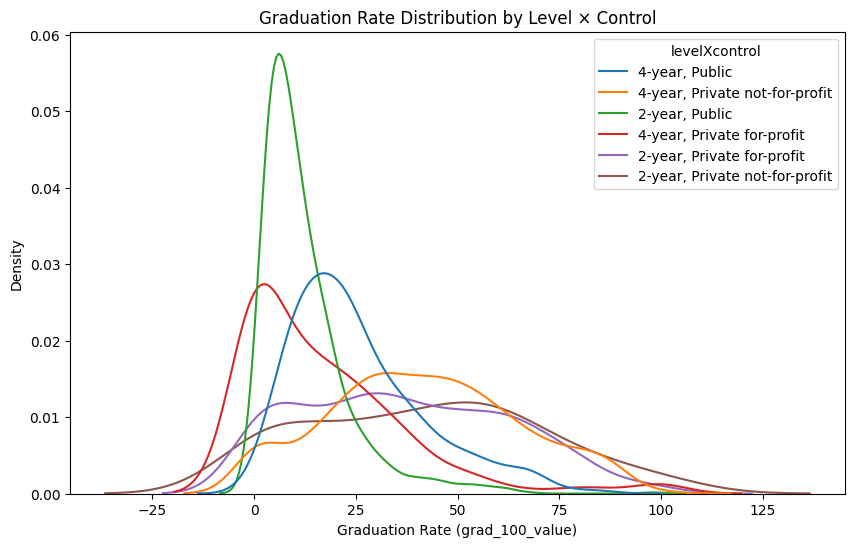

In [44]:
# Question 2.6 Create a new variable, df['levelXcontrol']=df['level']+',
# '+df['control'] that interacts level and control. Make a grouped kernel density plot.
# Which institutions appear to have the best graduation rates?

college['levelXcontrol'] = college['level'] + ', ' + college['control']

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=college,
    x='grad_100_value',
    hue='levelXcontrol',
    common_norm=False,
    fill=False,
)

plt.title("Graduation Rate Distribution by Level × Control")
plt.xlabel("Graduation Rate (grad_100_value)")
plt.ylabel("Density")
levels = college['levelXcontrol'].unique()
colors = sns.color_palette(n_colors=len(levels))
plt.show()

# The data show that 4 year private NFP schools have the highest graduation rates
# as they have the highest density for higher graduation rates. Not far behind them
# are private NFP 2 year schools, as they also have a higher graduation rate.


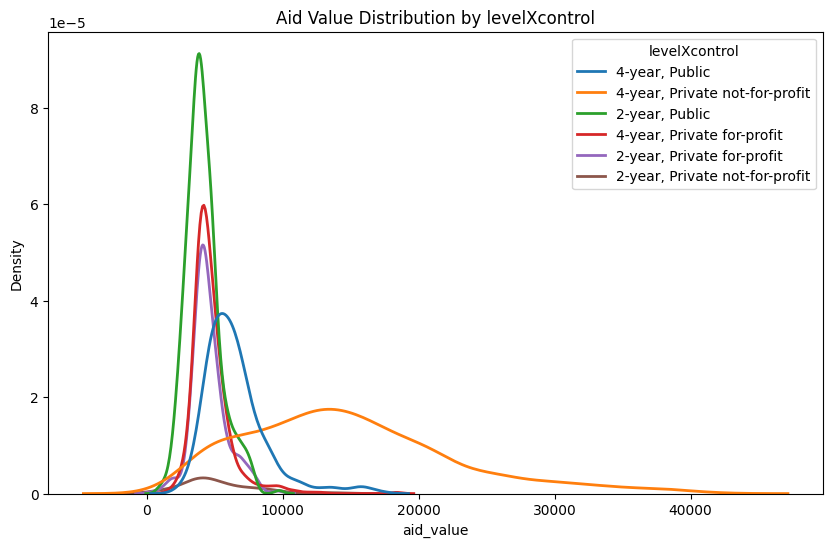

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [42]:
# Question 2.7 Make a kernel density plot of aid_value. Now group your graph by
# level and control. What explains the shape of the graph? Use groupby and .describe
# to make grouped calculations of statistical descriptions of aid_value by level and control.

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(
    data=college,
    x='aid_value',
    hue='levelXcontrol',
    linewidth=2,
    legend=True)
plt.title('Aid Value Distribution by levelXcontrol')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

# Doing so shows the density of the aid value of each type of institution. The 4 year private
# NFP schools have the highest density of the largest amount of aid value. Because the distribution of aid
# slope is shallower and broader, we can see that they distrubute aid more evenly
# than another type of College (such as 2 year public colleges as they have a high density
# over a more narrow and lower amount of aid. This makes sense, as often private 4 year
# NFP schools have the highest tuition and thus a greater need for aid.

college.groupby(["level", "control"])["aid_value"].describe()



/tmp/ipython-input-783039673.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


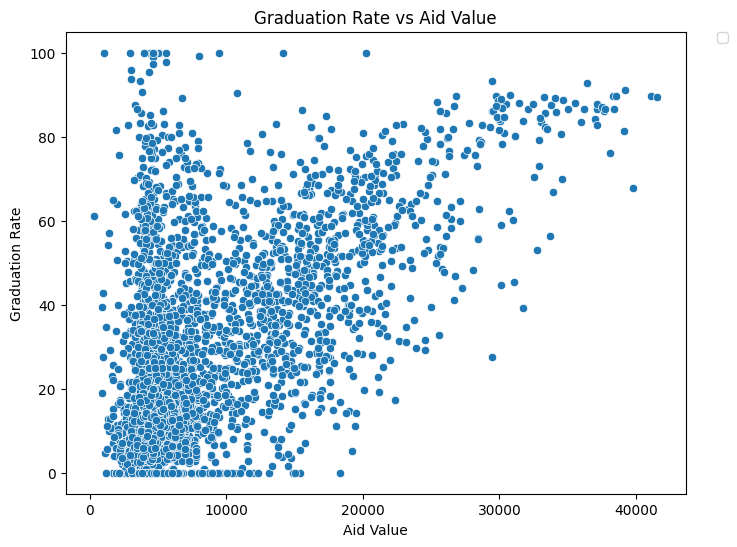

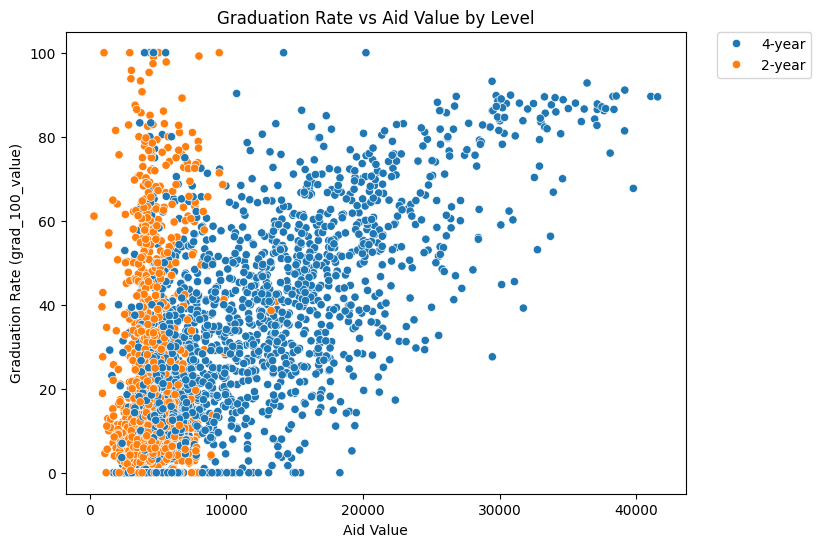

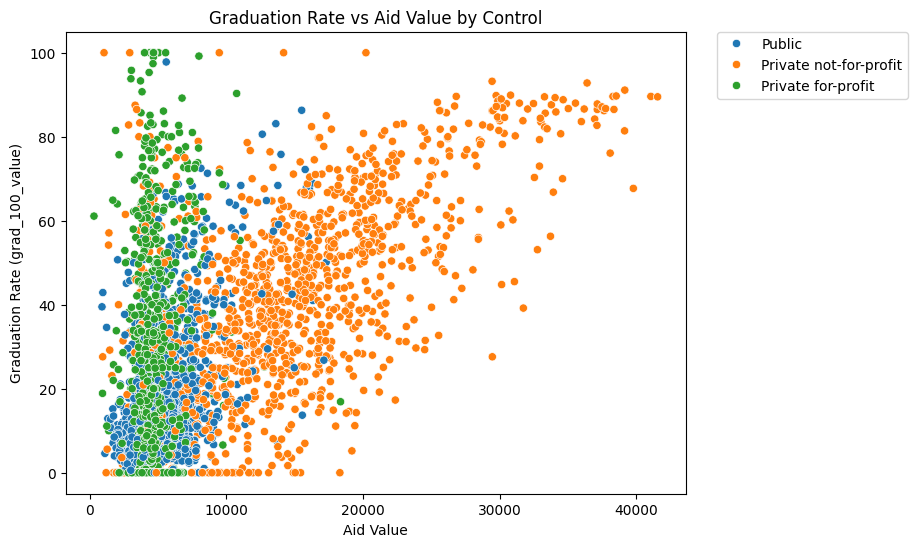

In [40]:
# Question 2.8 Make a scatterplot of grad_100_value by aid_value. Describe what you see.
# Now make the same plot, grouping by level and then control. Describe what you see.
# For which kinds of institutions does aid seem to increase graduation rates?

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=college,
    x='aid_value',
    y='grad_100_value'
)

plt.title("Graduation Rate vs Aid Value")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# The data show a loose positive correlation with aid value and graduation rate.
# Generally, as aid value increases, graduation rate increases. However, across the
# lower aid amounts (roughly 0-10000), we see that there is no real correlation between two.
# However, beyond that range, there exists the aforementioned positive correlation.

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=college,
    x="aid_value",
    y="grad_100_value",
    hue="level",
)

plt.title("Graduation Rate vs Aid Value by Level")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.legend(title="Level")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# The data show that this positive correlation between aid value and graduation
# rate is largely only exhibited for 4 year colleges. The 2 year colleges (orange)
# show roughly no correlation between aid value and graduation rate.

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=college,
    x="aid_value",
    y="grad_100_value",
    hue="control"
)

plt.title("Graduation Rate vs Aid Value by Control")
plt.xlabel("Aid Value")
plt.ylabel("Graduation Rate (grad_100_value)")
plt.legend(title="Control")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# These data show that there is roughly no correlation between aid value and graduation rate
# for private for profit colleges. The strongest correlation between these variables can be seen
# in private not for profit colleges. In the middle is public colleges which have a
# weak but slightly positive correlation for these variables.

# After analysis of these 3 graphs, we can see that aid has the greatest effect
# on graduation rates in 4 year private not-for-profit colleges.


